## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [2]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
columns_to_select = ['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
0,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
1,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE


In [4]:
# Drop rows with missing values
pumpkins.dropna(inplace=True)

pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


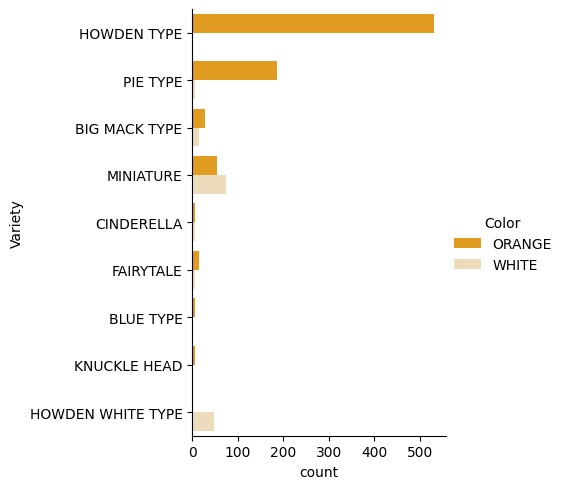

In [5]:
import seaborn as sns

palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette, 
)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# encode str values into int values according to position in list
# заменить одну колонку Item_size на 7 колонок,
# 1 будет в той колонке название которой совпадало с значением в
# оригинальной колонке Item Size 
item_size_categories = [['sml','med','med-lge','lge','xlge','jbo','exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)


In [7]:
from sklearn.preprocessing import OneHotEncoder

# each category represented by a binary column
# Каждая колонка заменится на набор других колонок. Именами этих
# колонок будут значения из каждой колонк: 
# City_name = ['BOSTON', 'COLUMBIA', ...]
# Package = ['36 inch', '24 inch', ...]
# ...
#   

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [8]:
# ColumnTransformer is used to combine multiple encoders into a single step 
# and apply them to the appropriate columns
# Соединит все созданные колонки в одну таблицу
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
# pumpkins.info()
encoded_features = ct.fit_transform(pumpkins)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [10]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [11]:
encoded_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ord__Item Size                     991 non-null    float64
 1   cat__City Name_ATLANTA             991 non-null    float64
 2   cat__City Name_BALTIMORE           991 non-null    float64
 3   cat__City Name_BOSTON              991 non-null    float64
 4   cat__City Name_CHICAGO             991 non-null    float64
 5   cat__City Name_COLUMBIA            991 non-null    float64
 6   cat__City Name_DALLAS              991 non-null    float64
 7   cat__City Name_DETROIT             991 non-null    float64
 8   cat__City Name_LOS ANGELES         991 non-null    float64
 9   cat__City Name_MIAMI               991 non-null    float64
 10  cat__City Name_NEW YORK            991 non-null    float64
 11  cat__City Name_PHILADELPHIA        991 non-null    float64
 12

In [12]:
encoded_pumpkins['Color'].value_counts()

Color
0    835
1    156
Name: count, dtype: int64

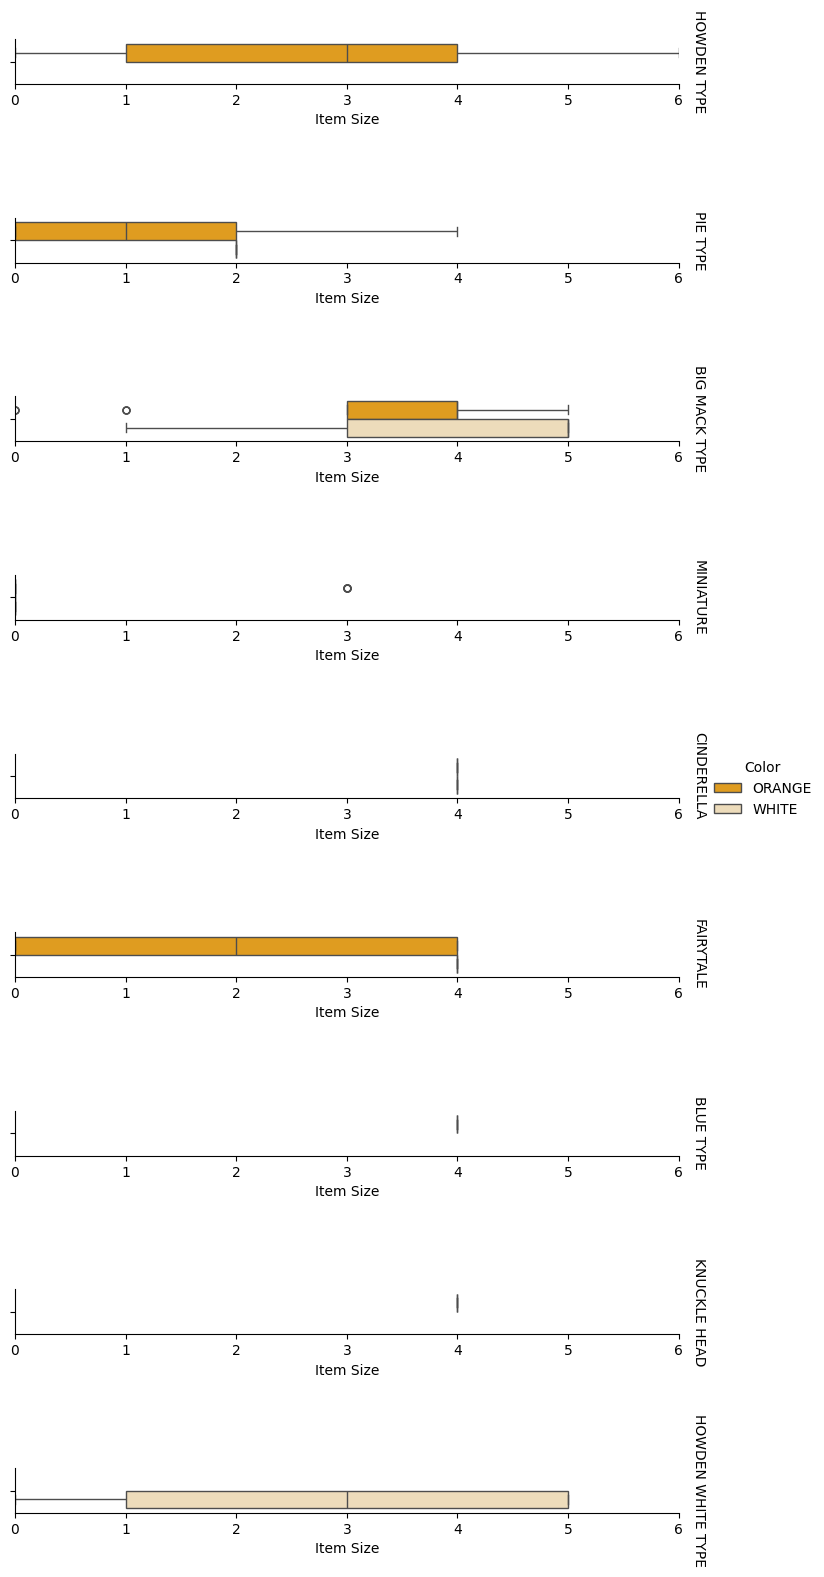

In [13]:
palette = { 
    'ORANGE' : 'orange',
    'WHITE' : 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

# график-счетчик - 
g = sns.catplot(
    data=pumpkins,
    # hue - по вертикали, row - несколько графиков на каждый тип Variety
    x='Item Size', hue='Color', row='Variety',
    # kind - тип отображения данных
    kind='box', orient='h',
    sharex=False, margin_titles=True,
    # height - высота строчек, aspect - длина строчек
    height=1.8, aspect=4, palette=palette
)
# xlim - ограничение по горизонтальной оси
g.set(xlabel='Item Size', ylabel='').set(xlim=(0,6))
g.set_titles(row_template="{row_name}")


<Axes: xlabel='Color', ylabel='ord__Item Size'>

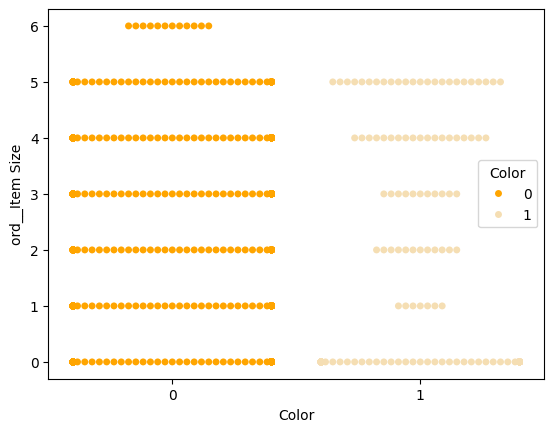

In [14]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
0: 'orange',
1: 'wheat'
}
# график в виде роя*
sns.swarmplot(x="Color", y="ord__Item Size", hue='Color', data=encoded_pumpkins, palette=palette)

In [15]:
from sklearn.model_selection import train_test_split
# encoded_pumpkins.columns  - all columns
# difference(['Color'])  - exclued column 'Color'
# выборка всех столбцов в  dataframe encoded_pumpkins кроме столбца 'Color'
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Color contains 2 unique values: 0 and 1, so there are two rows with data.
# Precision(точность) - % от всех предсказанных как 0 действительно являются 0
# Recall(полнота) -  % от всех реальных (из тестовой выборки) были правильно предсказаны как 0
# Support - кол-во появлений каждого значения
# f1-score - 
# Accuracy - доля правильных ответов из всех ответов
#  
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [ ]:
from sklearn.metrics import confusion_matrix
# анализируется predictions список с y_test списком.
# матрица 2х2 так как в color два уникальных значения
# [0,0] TN - кол-во совпадений значений 0 в предсказанной и тестовой выборках: 162
# [0,1] FP - кол-во несовпадений: предсказания дали 1, но в тестовой выборке был 0: 4
# [1,0] FN - кол-во несовпадений: предсказания дали 0, но в тестовой выборке был 1: 11
# [1,1] TP - кол-во совпадений для значения 1: 22
# размер тестовой выборки: 162+4+11+22 = 199 значений
#    0   1
# 0 TN  FP
# 1 FN  TP
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

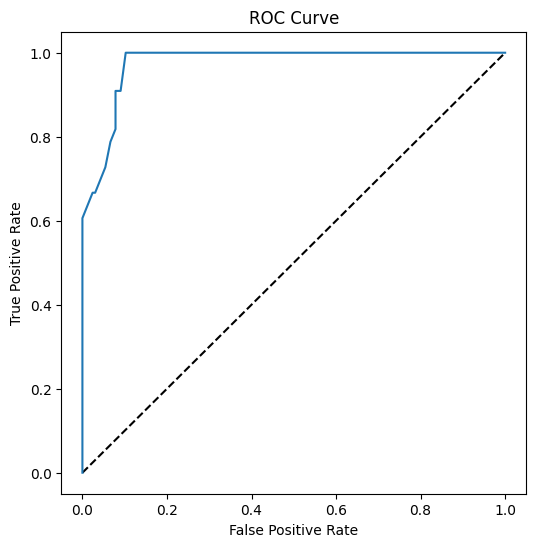

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# predict_proba - возвращает вероятность принадлежности предсказанного
# значения к значениям из выборки, а не само предсказанное значение
# если значений два типа: 0 или 1, то для каждого тестового значения
# будет возвращаться массив из двух чисел [0.63, 3.7] к примеру, то есть
# вероятность что это тестовое значение относится к первому типу 0.63   
y_scores = model.predict_proba(X_test)
# print(y_scores)

# Receiver Operating Characteristic
# ROC-кривая используется для оценки качества бинарной классификации. 
# Она строится на основе соотношения между True Positive Rate (TPR) 
# и False Positive Rate (FPR) при различных порогах классификации
# 
# fpr (False Positive Rate): Это массив, содержащий значения 
# False Positive Rate для каждого порога
# 
# tpr (True Positive Rate): Это массив, содержащий значения 
# True Positive Rate для каждого порога. TPR также называется чувствительностью (recall)
# 
# thresholds: Это массив пороговых значений, которые использовались 
# для вычисления FPR и TPR. Порог определяет, при какой вероятности 
# пример будет отнесен к классу 1. 

# y_scores: Это выходной массив, содержащий вероятности для каждого класса. 
# Например, если модель бинарная, то y_scores будет иметь форму (n_samples, 2), 
# где n_samples — количество примеров в X_test, а второй элемент 
# (например, y_scores[:, 1]) — вероятность принадлежности к классу 1.
# ЛУЧШЕ - когда график резко поднимается вверх и идет вдоль верхнего края графика
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# AUC (Area Under Curve) — это метрика, которая показывает, насколько хорошо
#  модель разделяет классы. Чем ближе AUC к 1, тем лучше модель.
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

0.9749908725812341
